In [571]:
import pandas as pd
import numpy as np
import json
import pickle
from pandas.io.json import json_normalize
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression as lr
import sys
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import metrics 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer



In [570]:
!{sys.executable} -m pip install xgboost

In [400]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt

In [20]:
df_application = pd.read_csv("application_train.csv")
df_bureau = pd.read_csv("bureau.csv")
df_bureau_balance = pd.read_csv("bureau_balance.csv")
df_credit_card_bal = pd.read_csv("credit_card_balance.csv")
df_installments_pay = pd.read_csv("installments_payments.csv")
df_POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
df_previous_app = pd.read_csv("previous_application.csv")
# with open("nba_rookie_df.pkl", 'rb') as picklefile: 
#     nba_rookie_df = pickle.load(picklefile)

In [413]:
with open('application_train.pkl', 'wb') as picklefile:
    pickle.dump(df_application, picklefile)
with open('bureau.pkl', 'wb') as picklefile:
    pickle.dump(df_bureau, picklefile)
with open('bureau_balance.pkl', 'wb') as picklefile:
    pickle.dump(df_bureau_balance, picklefile)
with open('credit_card_balance.pkl', 'wb') as picklefile:
    pickle.dump(df_credit_card_bal, picklefile)
with open('installments_payments.pkl', 'wb') as picklefile:
    pickle.dump(df_installments_pay, picklefile)
with open('POS_CASH_balance.pkl', 'wb') as picklefile:
    pickle.dump(df_POS_CASH_balance, picklefile)
with open('previous_application.pkl', 'wb') as picklefile:
    pickle.dump(df_previous_app, picklefile)

# explore+clean: df_application

In [217]:
#Documentation of all dataframes created:
# 1.) df_application = Original application dataframe
# 2.) income_type_avg = calcualtes income avgs based on NAME_INCOME_TYPE
# 3.) df_occupation_count = distribution of count of people by NAME_INCOME_TYPE
# 4.) occupation_cat_default_df = grouped by NAME_INCOME_TYPE and OCCUPATION_TYPE to see the TARGET total by each group
# 5.) columns_with_nullVal_counts_df = df of number of null values desc SORTED by column
# 6.) df_application_v2 = a trimmed down version of important features (relationship exploration)

In [23]:
df_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [55]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f92f2e8>]],
      dtype=object)

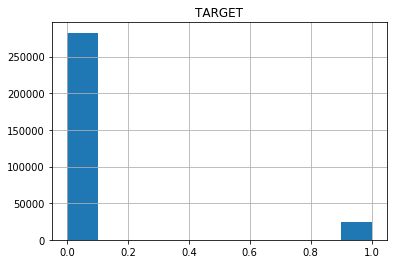

In [8]:
#high amount of skew noticed in the data set 
df_application.hist(column='TARGET', bins = 10)

In [19]:
#Around 92% of target value is 0(people did not have a late payment). Around 8% had a late payment
df_application.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [259]:
df_application["debt_to_income_ratio"] = df_application["AMT_ANNUITY"]/(df_application["AMT_INCOME_TOTAL"]/12)
df_application["est_loan_period"] = df_application["AMT_CREDIT"]/(df_application["AMT_ANNUITY"])
                                                                        
                                                                                                                                                
                                                                        

In [261]:
df_application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,debt_to_income_ratio,est_loan_period
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.463733,16.461104
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.586600,36.234085
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.200000,20.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.638800,10.532818
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.159556,23.461618
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,3.335455,17.824857
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0.0,0.0,0.0,1.0,1.0,2.0,2.898316,37.789061
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.402500,36.363636
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,3.608160,30.142344
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,20.000000


In [262]:
df_occupation_count = df_application["NAME_INCOME_TYPE"].value_counts().reset_index()
df_occupation_count.rename(index=str, columns={'index':'OCCUPATION', 'NAME_INCOME_TYPE': 'COUNT'}, inplace=True)
df_occupation_count

,OCCUPATION,COUNT
0,Working,158774
1,Commercial associate,71617
2,Pensioner,55362
3,State servant,21703
4,Unemployed,22
5,Student,18
6,Businessman,10
7,Maternity leave,5


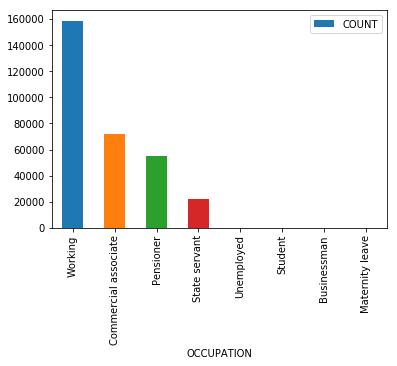

In [263]:
occupation_bar = df_occupation_count.plot.bar(x="OCCUPATION", y="COUNT")

In [264]:
#Grouping by the OCCUPATION & calculating the average salary for that OCCUPATION
income_type_avg = df_application.groupby(["NAME_INCOME_TYPE"])["AMT_INCOME_TOTAL"].mean()

In [265]:
income_type

NAME_INCOME_TYPE
Businessman             652500.000000
Commercial associate    202955.327289
Maternity leave         140400.000000
Pensioner               136401.292273
State servant           179737.969506
Student                 170500.000000
Unemployed              110536.363636
Working                 163169.889223
Name: AMT_INCOME_TOTAL, dtype: float64

In [266]:
df_application["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [267]:
#df_application['DAYS_BIRTH']
df_application.loc[df_application['NAME_INCOME_TYPE'] == 'Working'][["OCCUPATION_TYPE", "AMT_INCOME_TOTAL", "TARGET"]].head()

,OCCUPATION_TYPE,AMT_INCOME_TOTAL,TARGET
0,Laborers,202500.0,1
2,Laborers,67500.0,0
3,Laborers,135000.0,0
4,Core staff,121500.0,0
9,Laborers,135000.0,0


In [268]:
occupation_cat_default_df = df_application.groupby(["NAME_INCOME_TYPE", "OCCUPATION_TYPE"])["TARGET"].sum().reset_index()

In [269]:
#This is to see what income type people default on application loans
occupation_cat_default_df.sort_values(by='TARGET', ascending=False)

,NAME_INCOME_TYPE,OCCUPATION_TYPE,TARGET
59,Working,Laborers,4567
65,Working,Sales staff,2116
55,Working,Drivers,1542
10,Commercial associate,Laborers,1114
54,Working,Core staff,974
16,Commercial associate,Sales staff,952
61,Working,Managers,694
67,Working,Security staff,560
12,Commercial associate,Managers,551
6,Commercial associate,Drivers,497


In [270]:
df_application.groupby(["NAME_INCOME_TYPE", "OCCUPATION_TYPE"])["AMT_INCOME_TOTAL"].median().reset_index()

,NAME_INCOME_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL
0,Businessman,Core staff,180000.0
1,Businessman,Managers,675000.0
2,Commercial associate,Accountants,184500.0
3,Commercial associate,Cleaning staff,135000.0
4,Commercial associate,Cooking staff,135000.0
5,Commercial associate,Core staff,176107.5
6,Commercial associate,Drivers,189000.0
7,Commercial associate,HR staff,180000.0
8,Commercial associate,High skill tech staff,180000.0
9,Commercial associate,IT staff,222750.0


In [271]:
df_application[pd.isna(df_application["AMT_CREDIT"])]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,debt_to_income_ratio,est_loan_period


In [419]:
df_application = pd.merge(df_application, num_loans_prev_issued_df, how="inner", on=["SK_ID_CURR"])

In [420]:
df_application = pd.merge(df_application, amt_applied_amt_received_diff_df, how="inner", on=["SK_ID_CURR"])

In [421]:
#Which columns has the most null values 
columns_with_nullVal_counts_df = df_application.isna().sum().sort_values(ascending=False).reset_index()

In [422]:
columns_with_nullVal_counts_df.rename(columns={"index":"Col_name", 0:"Values"}, inplace=True)

In [423]:
columns_with_nullVal_counts_df.head(10)

,Col_name,Values
0,COMMONAREA_MODE,204562
1,COMMONAREA_MEDI,204562
2,COMMONAREA_AVG,204562
3,NONLIVINGAPARTMENTS_AVG,203325
4,NONLIVINGAPARTMENTS_MODE,203325
5,NONLIVINGAPARTMENTS_MEDI,203325
6,FONDKAPREMONT_MODE,200286
7,LIVINGAPARTMENTS_MODE,200205
8,LIVINGAPARTMENTS_AVG,200205
9,LIVINGAPARTMENTS_MEDI,200205


In [424]:
#67 / 122 columns have null values
columns_with_nullVal_counts_df.loc[columns_with_nullVal_counts_df["Values"] != 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 2 columns):
Col_name    67 non-null object
Values      67 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [466]:
df_application_v2 = df_application[["SK_ID_CURR", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", 
                                  "AMT_ANNUITY", "AMT_GOODS_PRICE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
                                  "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "REGION_POPULATION_RELATIVE",
                                  "DAYS_EMPLOYED", "AMT_REQ_CREDIT_BUREAU_HOUR", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5"
                                    , "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", 
                                    "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16"
                                  , "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON"
                                  , "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", 'debt_to_income_ratio', 'est_loan_period', 
                                    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', "NUM_LOANS_PREV_ISSUED", "AMT_APPLIED_VS_AMT_RECEIVED", "TARGET"]]

df_application_viz = df_application_v2[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED', 'CODE_GENDER', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'debt_to_income_ratio', 'AMT_CREDIT', 'est_loan_period', 'TARGET']]




In [426]:
df_application_v2["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(value= -1, inplace=True )
df_application_v2["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(value= -1, inplace=True )
df_application_v2["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(value= -1, inplace=True )
df_application_v2["AMT_REQ_CREDIT_BUREAU_MON"].fillna(value= -1, inplace=True )
df_application_v2["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(value= -1, inplace=True )
df_application_v2["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(value= -1, inplace=True )

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [427]:
amt_bureau_hour_target_df = df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_HOUR"])["TARGET"].value_counts()
amt_bureau_day_target_df = df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_DAY"])["TARGET"].value_counts()
amt_bureau_week_target_df = df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_WEEK"])["TARGET"].value_counts()
amt_bureau_mon_target_df = df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_MON"])["TARGET"].value_counts()
amt_bureau_qrt_target_df = df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_QRT"])["TARGET"].value_counts()
amt_bureau_year_target_df = df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_YEAR"])["TARGET"].value_counts()

**All of the below num inquiries indicate that the MORE inquiries conducted, the LESS incidences 
of default were present**

In [428]:
df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_HOUR"])["TARGET"].mean()
df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_DAY"])["TARGET"].mean()
df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_MON"])["TARGET"].mean()
df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_WEEK"])["TARGET"].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK  TARGET
-1.0                        0          35207
                            1           4127
 0.0                        0         224242
                            1          19058
 1.0                        0           7500
                            1            631
 2.0                        0            161
                            1             19
 3.0                        0             47
                            1              4
 4.0                        0             26
                            1              4
 5.0                        0              7
                            1              1
 6.0                        0             16
                            1              1
 7.0                        0              1
 8.0                        0              5
Name: TARGET, dtype: int64

In [288]:
df_application_v2.groupby(["AMT_REQ_CREDIT_BUREAU_DAY"])["TARGET"].mean()

AMT_REQ_CREDIT_BUREAU_DAY
-1.0    0.103374
 0.0    0.077096
 1.0    0.096749
 2.0    0.103774
 3.0    0.044444
 4.0    0.115385
 5.0    0.000000
 6.0    0.000000
 8.0    0.000000
 9.0    0.000000
Name: TARGET, dtype: float64

In [289]:
#amt_bureau_hour_target_df
#amt_bureau_day_target_df
# amt_bureau_week_target_df
# amt_bureau_mon_target_df
# amt_bureau_qrt_target_df
#amt_bureau_year_target_df

In [290]:
#most people DO NOT submit. 
# 8% default of those that dont submit
#This seems to be the case in every flag document. 
flag_doc_2_target_count_df

FLAG_DOCUMENT_2  TARGET
0                0         282677
                 1          24821
1                0              9
                 1              4
Name: TARGET, dtype: int64

In [295]:
#df_application_v2.corr()

In [429]:
df_application_v2 = pd.get_dummies(df_application_v2)


In [471]:
df_application_viz = pd.get_dummies(df_application_viz)

In [430]:
X = df_application_v2.drop(columns = ["TARGET"])
y = df_application_v2["TARGET"]
X = X.fillna(-99999)



In [472]:
X1 = df_application_viz.drop(columns=["TARGET"])
y1 = df_application_viz["TARGET"]
X_train, X_test, y_train, y_test 
    = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [473]:
X1.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_EMPLOYED,AMT_ANNUITY,AMT_INCOME_TOTAL,debt_to_income_ratio,AMT_CREDIT,est_loan_period,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,0.083037,0.262949,0.139376,-637,24700.5,202500.0,1.463733,406597.5,16.461104,0,1,0
1,0.311267,0.622246,NaN,-1188,35698.5,270000.0,1.586600,1293502.5,36.234085,1,0,0
2,NaN,0.555912,0.729567,-225,6750.0,67500.0,1.200000,135000.0,20.000000,0,1,0
3,NaN,0.650442,NaN,-3039,29686.5,135000.0,2.638800,312682.5,10.532818,1,0,0
4,NaN,0.322738,NaN,-3038,21865.5,121500.0,2.159556,513000.0,23.461618,0,1,0


In [527]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)


In [528]:
model3 = xgb.XGBClassifier()
model3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [529]:
preds = model3.predict(X_test)
len(preds)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


96049

In [531]:
len(y_test)

96049

In [533]:
len(model3.predict_proba(X_test))

96049

In [536]:
score = roc_auc_score(y_test, model3.predict_proba(X_test)[:,1])
score

0.7461906866659513

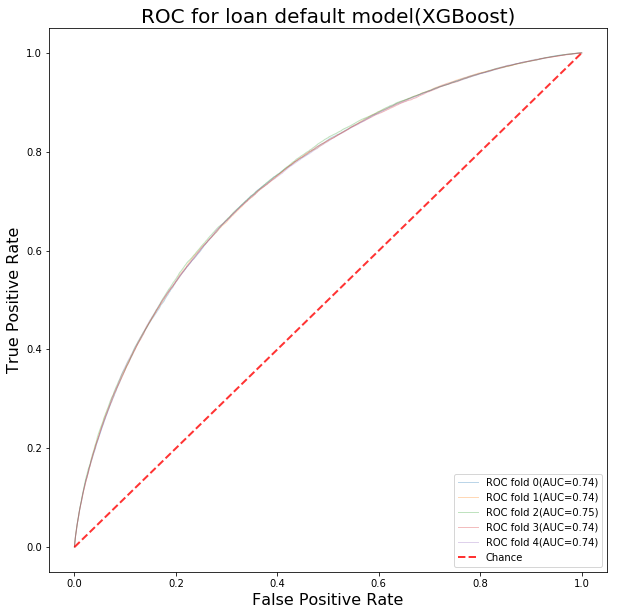

In [565]:
kf1 = KFold(n_splits=5)
scores_viz = []
probabilities = []
classifications = []
i= 0
plt.figure(figsize=(10, 10))
for train_appl, val_appl in kf1.split(X1, y1):
    model2 = xgb.XGBClassifier()
    model2.fit(X1.values[val_appl],y1.values[val_appl])
    #probabilities.append(model2.predict_proba(X1.values[val_appl])[:,1])
    #scores_viz.append(roc_auc_score(y1[val_appl],model2.predict_proba(X1.values[val_appl])[:,1]))
    #classifications.append(model2.predict(X1.values[val_appl]))
    probas = model2.predict_proba(X1.values[train_appl])[:,1]
    
    fpr, tpr, thresholds = roc_curve(y1.values[train_appl], probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d(AUC=%0.2f)'%(i, roc_auc))
    i+=1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC for loan default model(XGBoost)', fontsize = 20)
plt.legend(loc="lower right")
plt.show()


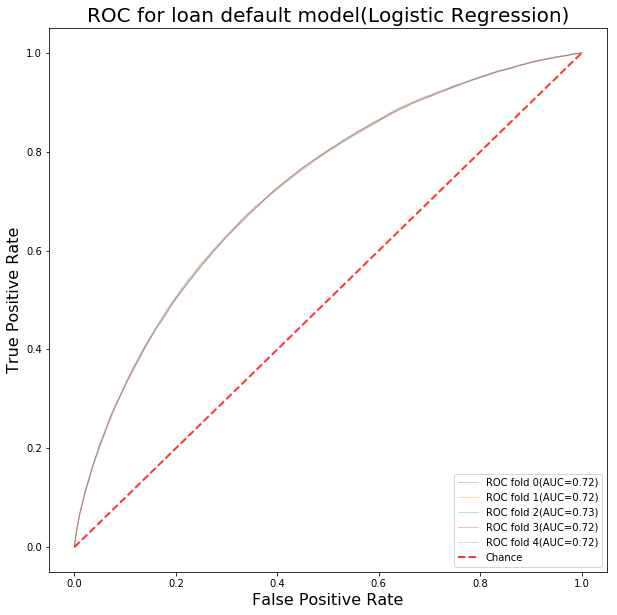

In [561]:
kf1 = KFold(n_splits=5)
scores_viz = []
probabilities = []
classifications = []
i= 0
plt.figure(figsize=(10, 10))
for train_appl, val_appl in kf1.split(X1, y1):
    model2 = make_pipeline(Imputer(), StandardScaler(), LogisticRegression())
    model2.fit(X1.values[val_appl],y1.values[val_appl])
    #probabilities.append(model2.predict_proba(X1.values[val_appl])[:,1])
    #scores_viz.append(roc_auc_score(y1[val_appl],model2.predict_proba(X1.values[val_appl])[:,1]))
    #classifications.append(model2.predict(X1.values[val_appl]))
    probas = model2.predict_proba(X1.values[train_appl])[:,1]
    
    fpr, tpr, thresholds = roc_curve(y1.values[train_appl], probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d(AUC=%0.2f)'%(i, roc_auc))
    i+=1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC for loan default model(Logistic Regression)', fontsize = 20)
plt.legend(loc="lower right")
plt.show()


In [513]:

scores_viz_avg = np.mean(scores_viz)
#scores_viz_avg
scores_viz

[0.7479057101548097,
 0.7491088769707122,
 0.740330365471179,
 0.7484885270651467,
 0.7485122900339543]

In [514]:
final_proba = probabilities[3]
final_proba


array([0.10438559, 0.08679584, 0.21302447, ..., 0.04374351, 0.20787756,
       0.03906392], dtype=float32)

In [515]:
type(classifications[3])

numpy.ndarray

In [517]:
len(classifications[3])

58211

In [476]:
with open('model2.pkl', 'wb') as fid:
    pickle.dump(model2, fid,2)

In [431]:
kf = KFold(n_splits=5)
scores = 0
for train_appl, val_appl in kf.split(X, y):
    model1 = xgb.XGBClassifier()
    model1.fit(X.values[val_appl],y.values[val_appl])
    scores = (roc_auc_score(y[train_appl],model1.predict_proba(X.values[train_appl])[:,1]))
    


## This is my baseline AUC 

In [437]:
X.columns[7]

'DAYS_EMPLOYED'

In [432]:
scores

0.7485811651669734

#### Calculate feature importance - XG Boost

In [566]:
dtrain = xgb.DMatrix( X1, label=y1)
dtrain.feature_names

['EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'AMT_INCOME_TOTAL',
 'debt_to_income_ratio',
 'AMT_CREDIT',
 'est_loan_period',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA']

Text(0.5,1,'Home loan feature importances(XGBoost)')

<Figure size 720x720 with 0 Axes>

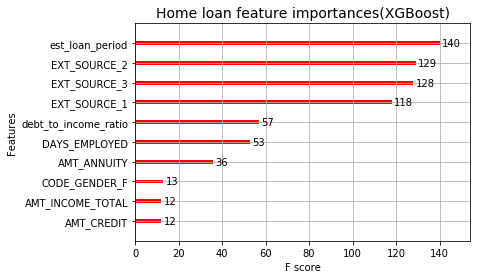

In [590]:
model2.get_booster().get_score(importance_type='weight')
plt.figure(figsize=(10, 10))
mapper = {'f{0}'.format(i): v for i, v in enumerate(dtrain.feature_names)}
mapped = {mapper[k]: v for k, v in model2.get_booster().get_score(importance_type='weight').items()}
mapped
xgb.plot_importance(mapped, color='red')
plt.title("Home loan feature importances(XGBoost)", fontsize=14)

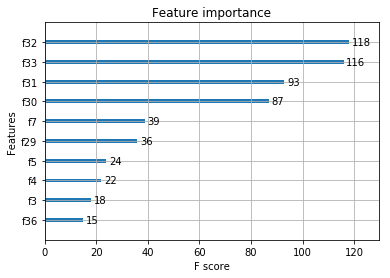

In [406]:
xgb.plot_importance(model1, max_num_features=10)


#### Calculate feature importance - Random Forest 

In [381]:
rf = RandomForestClassifier()

In [382]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Open any pickedled files below, based on DF creation in different files 

In [418]:
with open("num_loans_prev_issued.pkl", 'rb') as picklefile: 
    num_loans_prev_issued_df = pickle.load(picklefile)
with open("amt_applied_amt_received_diff.pkl", 'rb') as picklefile: 
    amt_applied_amt_received_diff_df = pickle.load(picklefile)

In [387]:
names = ["SK_ID_CURR", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", 
                                  "AMT_ANNUITY", "AMT_GOODS_PRICE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
                                  "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "REGION_POPULATION_RELATIVE",
                                  "DAYS_EMPLOYED", "AMT_REQ_CREDIT_BUREAU_HOUR", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5"
                                    , "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", 
                                    "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16"
                                  , "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON"
                                  , "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", 'debt_to_income_ratio', 'est_loan_period', 
                                    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.0973, 'AMT_REQ_CREDIT_BUREAU_DAY'), (0.0717, 'SK_ID_CURR'), (0.0713, 'AMT_REQ_CREDIT_BUREAU_WEEK'), (0.0701, 'FLAG_DOCUMENT_14'), (0.0696, 'FLAG_DOCUMENT_15'), (0.0657, 'FLAG_OWN_REALTY'), (0.0652, 'AMT_CREDIT'), (0.0593, 'AMT_INCOME_TOTAL'), (0.059, 'FLAG_OWN_CAR'), (0.0517, 'CODE_GENDER'), (0.0489, 'CNT_CHILDREN'), (0.0414, 'FLAG_DOCUMENT_16'), (0.0312, 'FLAG_DOCUMENT_13'), (0.0182, 'NAME_CONTRACT_TYPE'), (0.0124, 'FLAG_DOCUMENT_12'), (0.0121, 'FLAG_DOCUMENT_11'), (0.009, 'EXT_SOURCE_3'), (0.0072, 'EXT_SOURCE_2'), (0.007, 'EXT_SOURCE_1'), (0.0049, 'NAME_INCOME_TYPE'), (0.0046, 'FLAG_DOCUMENT_10'), (0.0042, 'AMT_REQ_CREDIT_BUREAU_YEAR'), (0.0041, 'debt_to_income_ratio'), (0.0031, 'DAYS_EMPLOYED'), (0.0027, 'AMT_ANNUITY'), (0.0026, 'FLAG_DOCUMENT_9'), (0.0022, 'NAME_HOUSING_TYPE'), (0.0018, 'AMT_REQ_CREDIT_BUREAU_MON'), (0.0017, 'NAME_FAMILY_STATUS'), (0.0015, 'AMT_REQ_CREDIT_BUREAU_QRT'), (0.001, 'FLAG_DOCUMENT_8'), (0.0006, 'AMT_REQ_CREDIT_BUREAU_H

In [417]:
df_application_v2.shape

(307511, 69)

In [414]:
with open('df_application_v2.pkl', 'wb') as picklefile:
    pickle.dump(df_application_v2, picklefile)